<a href="https://colab.research.google.com/github/slinkierchip/Identificacion-del-lenguaje-de-se-as-americanas/blob/main/Identificacion_de_manos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image as image_utils
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import load_model
import itertools
from sklearn.metrics import confusion_matrix

Mounted at /content/drive


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download grassknoted/asl-alphabet
! unzip /content/asl-alphabet.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating:

In [ ]:
K.clear_session()

data_entrenamiento = '/content/asl_alphabet_train/asl_alphabet_train'
data_validacion = '/content/asl_alphabet_test'

epocas=30
longitud, altura = 150, 150
batch_size = 32

Conv1 = 32
Conv2 = 64
Conv3 = 128


tamano_filtro1 = (4, 4)
tamano_filtro2 = (3, 3)
tamano_filtro3 = (2, 2)

tamano_pool = (2, 2)
clases = 29
lr = 0.005

In [ ]:
validation_ds = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,   #Pasar los pixeles de 0 a 255 | 0 a 1
    shear_range = 0.3, #Generar nuestras imagenes inclinadas para un  mejor entrenamiento
    zoom_range = 0.3,  #Genera imagenes con zoom para un mejor entrenamiento
    horizontal_flip=True, #Invierte las imagenes para mejor entrenamiento
    validation_split=0.2
)

prueba = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,   #Pasar los pixeles de 0 a 255 | 0 a 1
    validation_split=0.2
)

val=validation_ds.flow_from_directory(
    data_entrenamiento,
    target_size = (altura, longitud),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training'
)

train=prueba.flow_from_directory(
    data_entrenamiento,
    target_size = (altura, longitud),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation'

) 

test = tf.keras.utils.image_dataset_from_directory(
    data_entrenamiento,
    validation_split=0.02,
    subset="validation",
    seed=123,
    image_size=(longitud, altura),
    batch_size=batch_size)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 87000 files belonging to 29 classes.
Using 1740 files for validation.


In [ ]:
cnn=tf.keras.models.Sequential()

cnn.add(Convolution2D(Conv1, tamano_filtro1, padding='same', input_shape=(altura, longitud,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Convolution2D(Conv2, tamano_filtro2, padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Convolution2D(Conv3, tamano_filtro3, padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Flatten()) 

cnn.add(Dense(15000,activation='relu')) 

cnn.add(Dropout(0.5)) 

cnn.add(Dense(clases, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn.fit(val, epochs=epocas, validation_data=train)

cnn.save('/content/drive/MyDrive/modelo2.h5')
cnn.save_weights('/content/drive/MyDrive/pesos2.h5')

Epoch 1/20
2175/2175 [==============================] - 447s 205ms/step - loss: 1.1720 - accuracy: 0.6292 - val_loss: 1.3926 - val_accuracy: 0.5876
Epoch 2/20
2175/2175 [==============================] - 443s 204ms/step - loss: 0.2800 - accuracy: 0.9049 - val_loss: 1.4199 - val_accuracy: 0.6643
Epoch 3/20
2175/2175 [==============================] - 443s 204ms/step - loss: 0.1794 - accuracy: 0.9402 - val_loss: 1.3406 - val_accuracy: 0.6830
Epoch 4/20
2175/2175 [==============================] - 443s 204ms/step - loss: 0.1420 - accuracy: 0.9548 - val_loss: 1.6080 - val_accuracy: 0.6949
Epoch 5/20
2175/2175 [==============================] - 444s 204ms/step - loss: 0.1237 - accuracy: 0.9605 - val_loss: 2.0924 - val_accuracy: 0.6559
Epoch 6/20
2175/2175 [==============================] - 450s 207ms/step - loss: 0.1051 - accuracy: 0.9671 - val_loss: 1.5123 - val_accuracy: 0.6612
Epoch 7/20
2175/2175 [==============================] - 450s 207ms/step - loss: 0.1035 - accuracy: 0.9688 - val_

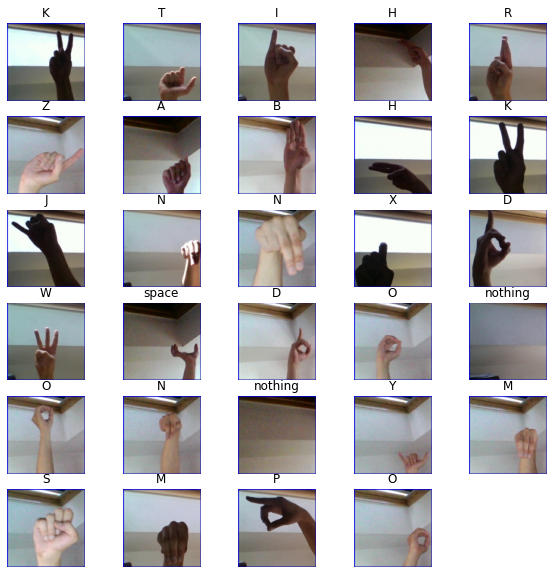

In [ ]:
import matplotlib.pyplot as plt

class_names = test.class_names

plt.figure(figsize=(10, 10))
for images, labels in test.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(6,5 , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

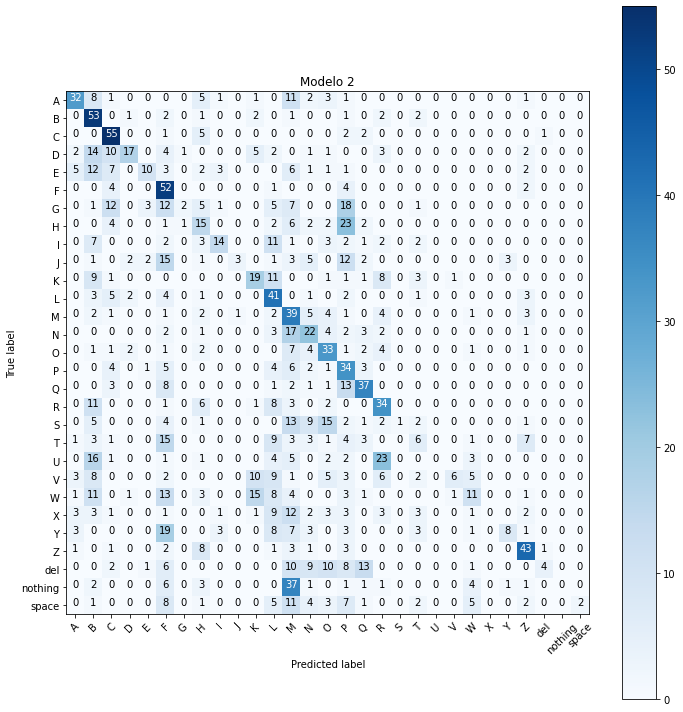

In [ ]:
def validar (model, pes):
  modelo = model
  peso =  pes
  cnn = load_model(modelo)  
  cnn.load_weights(peso) 

  actual = []
  pred = []
  for images, labels in test:
      for i in range(0, len(images)):
          image = images[i]
          image = np.expand_dims(image, axis=0)
          result = cnn.predict(image)
          pred.append(class_names[np.argmax(result)])
          actual.append(class_names[labels[i].numpy()])
  return actual, pred
      
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[actual,pred]=validar('/content/drive/MyDrive/modelo2.h5', '/content/drive/MyDrive/pesos2.h5')
cm = confusion_matrix(y_true=actual, y_pred=pred)
plot_confusion_matrix(cm=cm, classes=class_names, title='Modelo 2') 